In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import sys, os

### Data

In [5]:
data = pd.read_csv("data/filtered_tsla_options_w_greeks.csv")

### Functions 

In [6]:
def ordered_pairs(l1, l2, unique=True):
    
    l1, l2 = list(l1), list(l2)
    
    pairs = []
    for i in range(len(l1)):
        
        for e in l2[i:]:
            
            if unique and l1[i] == e:
                continue
            
            pairs.append([l1[i], e])
    
    return pairs

### Same Expiration Exposure

In [4]:
exp = data[data.date_current == "2020-07-13"][data.expiration_date == "2020-08-21"]

/home/zquantz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [5]:
calls = exp[exp.option_type == "C"]
puts = exp[exp.option_type == "P"]

itmc = calls[exp.stock_price - exp.strike_price > 0]
otmc = calls[exp.stock_price - exp.strike_price <= 0]

itmp = puts[exp.strike_price - exp.stock_price > 0]
otmp = puts[exp.strike_price - exp.stock_price <= 0]

/home/zquantz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/zquantz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/zquantz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/zquantz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [6]:
directions = [1, -1, -1, 1]

### Call Only

In [7]:
itmpairs = ordered_pairs(itmc.strike_price, itmc.strike_price, True)
otmpairs = ordered_pairs(otmc.strike_price, otmc.strike_price, True)

condor_strikes = ordered_pairs(itmpairs, otmpairs, True)
condor_strikes = [e[0] + e[1] for e in condor_strikes]
condor_strikes = [e for item in condor_strikes for e in item]

strikes = pd.DataFrame(condor_strikes, columns = ['strike_price'])
positionsc = strikes.merge(calls, on='strike_price', how='left')
positionsc['directions'] = directions * int(len(condor_strikes) / 4)

positionsc['NetDelta'] = positionsc.delta * positionsc.directions
positionsc['NetGamma'] = positionsc.gamma * positionsc.directions
positionsc['NetVega'] = positionsc.vega * positionsc.directions
positionsc['NetTheta'] = positionsc.theta * positionsc.directions
positionsc['NetVomma'] = positionsc.vomma * positionsc.directions
positionsc['NetUltima'] = positionsc.ultima * positionsc.directions

deltasc = positionsc.NetDelta.values.reshape(-1, 4).sum(axis=1)
gammasc = positionsc.NetGamma.values.reshape(-1, 4).sum(axis=1)
vegasc = positionsc.NetVega.values.reshape(-1, 4).sum(axis=1)
thetasc = positionsc.NetTheta.values.reshape(-1, 4).sum(axis=1)
vommasc = positionsc.NetVomma.values.reshape(-1, 4).sum(axis=1)
ultimasc = positionsc.NetUltima.values.reshape(-1, 4).sum(axis=1)

### Put Only

In [12]:
itmpairs = ordered_pairs(itmp.strike_price, itmp.strike_price, True)
otmpairs = ordered_pairs(otmp.strike_price, otmp.strike_price, True)

condor_strikes = ordered_pairs(otmpairs, itmpairs, True)
condor_strikes = [e[0] + e[1] for e in condor_strikes]
condor_strikes = [e for item in condor_strikes for e in item]

strikes = pd.DataFrame(condor_strikes, columns = ['strike_price'])
positionsp = strikes.merge(puts, on='strike_price', how='left')
positionsp['directions'] = directions * int(len(condor_strikes) / 4)

positionsp['NetDelta'] = positionsp.delta * positionsp.directions
positionsp['NetGamma'] = positionsp.gamma * positionsp.directions
positionsp['NetVega'] = positionsp.vega * positionsp.directions
positionsp['NetTheta'] = positionsp.theta * positionsp.directions
positionsp['NetVomma'] = positionsp.vomma * positionsp.directions
positionsp['NetUltima'] = positionsp.ultima * positionsp.directions

deltasp = positionsp.NetDelta.values.reshape(-1, 4).sum(axis=1)
gammasp = positionsp.NetGamma.values.reshape(-1, 4).sum(axis=1)
vegasp = positionsp.NetVega.values.reshape(-1, 4).sum(axis=1)
thetasp = positionsp.NetTheta.values.reshape(-1, 4).sum(axis=1)
vommasp = positionsp.NetVomma.values.reshape(-1, 4).sum(axis=1)
ultimasp = positionsp.NetUltima.values.reshape(-1, 4).sum(axis=1)

### ITMs

In [3]:
itmcalls = ordered_pairs(itmc.strike_price, itmc.strike_price, True)
itmputs = ordered_pairs(itmp.strike_price, itmp.strike_price, True)

condor_strikes = ordered_pairs(itmcalls, itmputs, True)
condor_strikes = [e[0] + e[1] for e in condor_strikes]
condor_strikes = [e for item in condor_strikes for e in item]

strikes = pd.DataFrame(condor_strikes, columns = ['strike_price'])
strikes['option_type'] = ['C', 'C', 'P', 'P'] * int(len(condor_strikes) / 4)

positionsitm = strikes.merge(exp, on=['strike_price', 'option_type'], how='left')
positionsitm['directions'] = directions * int(len(condor_strikes) / 4)

positionsitm['NetDelta'] = positionsitm.delta * positionsitm.directions
positionsitm['NetGamma'] = positionsitm.gamma * positionsitm.directions
positionsitm['NetVega'] = positionsitm.vega * positionsitm.directions
positionsitm['NetTheta'] = positionsitm.theta * positionsitm.directions
positionsitm['NetVomma'] = positionsitm.vomma * positionsitm.directions
positionsitm['NetUltima'] = positionsitm.ultima * positionsitm.directions

deltasitm = positionsitm.NetDelta.values.reshape(-1, 4).sum(axis=1)
gammasitm = positionsitm.NetGamma.values.reshape(-1, 4).sum(axis=1)
vegasitm = positionsitm.NetVega.values.reshape(-1, 4).sum(axis=1)
thetasitm = positionsitm.NetTheta.values.reshape(-1, 4).sum(axis=1)
vommasitm = positionsitm.NetVomma.values.reshape(-1, 4).sum(axis=1)
ultimasitm = positionsitm.NetUltima.values.reshape(-1, 4).sum(axis=1)

NameError: name 'ordered_pairs' is not defined

### OTMs

In [31]:
otmcalls = ordered_pairs(otmc.strike_price, otmc.strike_price, True)
otmputs = ordered_pairs(otmp.strike_price, otmp.strike_price, True)

condor_strikes = ordered_pairs(otmputs, otmcalls, True)
condor_strikes = [e[0] + e[1] for e in condor_strikes]
condor_strikes = [e for item in condor_strikes for e in item]

strikes = pd.DataFrame(condor_strikes, columns = ['strike_price'])
strikes['option_type'] = ['P', 'P', 'C', 'C'] * int(len(condor_strikes) / 4)

positionsotm = strikes.merge(exp, on=['strike_price', 'option_type'], how='left')
positionsotm['directions'] = directions * int(len(condor_strikes) / 4)

positionsotm['NetDelta'] = positionsotm.delta * positionsotm.directions
positionsotm['NetGamma'] = positionsotm.gamma * positionsotm.directions
positionsotm['NetVega'] = positionsotm.vega * positionsotm.directions
positionsotm['NetTheta'] = positionsotm.theta * positionsotm.directions
positionsotm['NetVomma'] = positionsotm.vomma * positionsotm.directions
positionsotm['NetUltima'] = positionsotm.ultima * positionsotm.directions

deltasotm = positionsotm.NetDelta.values.reshape(-1, 4).sum(axis=1)
gammasotm = positionsotm.NetGamma.values.reshape(-1, 4).sum(axis=1)
vegasotm = positionsotm.NetVega.values.reshape(-1, 4).sum(axis=1)
thetasotm = positionsotm.NetTheta.values.reshape(-1, 4).sum(axis=1)
vommasotm = positionsotm.NetVomma.values.reshape(-1, 4).sum(axis=1)
ultimasotm = positionsotm.NetUltima.values.reshape(-1, 4).sum(axis=1)

### Full Scope

In [60]:
stats = {}
df = data[data.date_current == '2020-07-13']
directions = [1, -1, -1, 1]

for expiration in df.expiration_date.unique():
    
    print(expiration)
    
    exp = df[df.expiration_date == expiration].reset_index(drop=True)

    calls = exp[exp.option_type == "C"]
    puts = exp[exp.option_type == "P"]

    itmc = calls[exp.stock_price - exp.strike_price > 0]
    otmc = calls[exp.stock_price - exp.strike_price <= 0]

    itmp = puts[exp.strike_price - exp.stock_price > 0]
    otmp = puts[exp.strike_price - exp.stock_price <= 0]
    
    ################################################################################
    
    itmpairs = ordered_pairs(itmc.strike_price, itmc.strike_price, True)
    otmpairs = ordered_pairs(otmc.strike_price, otmc.strike_price, True)

    condor_strikes = ordered_pairs(itmpairs, otmpairs, True)
    condor_strikes = [e[0] + e[1] for e in condor_strikes]
    condor_strikes = [e for item in condor_strikes for e in item]

    strikes = pd.DataFrame(condor_strikes, columns = ['strike_price'])
    positionsc = strikes.merge(calls, on='strike_price', how='left')
    positionsc['directions'] = directions * int(len(condor_strikes) / 4)

    positionsc['NetDelta'] = positionsc.delta * positionsc.directions
    positionsc['NetGamma'] = positionsc.gamma * positionsc.directions
    positionsc['NetVega'] = positionsc.vega * positionsc.directions
    positionsc['NetTheta'] = positionsc.theta * positionsc.directions
    positionsc['NetVomma'] = positionsc.vomma * positionsc.directions
    positionsc['NetUltima'] = positionsc.ultima * positionsc.directions

    deltasc = positionsc.NetDelta.values.reshape(-1, 4).sum(axis=1)
    gammasc = positionsc.NetGamma.values.reshape(-1, 4).sum(axis=1)
    vegasc = positionsc.NetVega.values.reshape(-1, 4).sum(axis=1)
    thetasc = positionsc.NetTheta.values.reshape(-1, 4).sum(axis=1)
    vommasc = positionsc.NetVomma.values.reshape(-1, 4).sum(axis=1)
    ultimasc = positionsc.NetUltima.values.reshape(-1, 4).sum(axis=1)
    
    ################################################################################

    itmpairs = ordered_pairs(itmp.strike_price, itmp.strike_price, True)
    otmpairs = ordered_pairs(otmp.strike_price, otmp.strike_price, True)

    condor_strikes = ordered_pairs(otmpairs, itmpairs, True)
    condor_strikes = [e[0] + e[1] for e in condor_strikes]
    condor_strikes = [e for item in condor_strikes for e in item]

    strikes = pd.DataFrame(condor_strikes, columns = ['strike_price'])
    positionsp = strikes.merge(puts, on='strike_price', how='left')
    positionsp['directions'] = directions * int(len(condor_strikes) / 4)

    positionsp['NetDelta'] = positionsp.delta * positionsp.directions
    positionsp['NetGamma'] = positionsp.gamma * positionsp.directions
    positionsp['NetVega'] = positionsp.vega * positionsp.directions
    positionsp['NetTheta'] = positionsp.theta * positionsp.directions
    positionsp['NetVomma'] = positionsp.vomma * positionsp.directions
    positionsp['NetUltima'] = positionsp.ultima * positionsp.directions

    deltasp = positionsp.NetDelta.values.reshape(-1, 4).sum(axis=1)
    gammasp = positionsp.NetGamma.values.reshape(-1, 4).sum(axis=1)
    vegasp = positionsp.NetVega.values.reshape(-1, 4).sum(axis=1)
    thetasp = positionsp.NetTheta.values.reshape(-1, 4).sum(axis=1)
    vommasp = positionsp.NetVomma.values.reshape(-1, 4).sum(axis=1)
    ultimasp = positionsp.NetUltima.values.reshape(-1, 4).sum(axis=1)
    
    ################################################################################
    
    itmcalls = ordered_pairs(itmc.strike_price, itmc.strike_price, True)
    itmputs = ordered_pairs(itmp.strike_price, itmp.strike_price, True)

    condor_strikes = ordered_pairs(itmcalls, itmputs, True)
    condor_strikes = [e[0] + e[1] for e in condor_strikes]
    condor_strikes = [e for item in condor_strikes for e in item]

    strikes = pd.DataFrame(condor_strikes, columns = ['strike_price'])
    strikes['option_type'] = ['C', 'C', 'P', 'P'] * int(len(condor_strikes) / 4)

    positionsitm = strikes.merge(exp, on=['strike_price', 'option_type'], how='left')
    positionsitm['directions'] = directions * int(len(condor_strikes) / 4)

    positionsitm['NetDelta'] = positionsitm.delta * positionsitm.directions
    positionsitm['NetGamma'] = positionsitm.gamma * positionsitm.directions
    positionsitm['NetVega'] = positionsitm.vega * positionsitm.directions
    positionsitm['NetTheta'] = positionsitm.theta * positionsitm.directions
    positionsitm['NetVomma'] = positionsitm.vomma * positionsitm.directions
    positionsitm['NetUltima'] = positionsitm.ultima * positionsitm.directions

    deltasitm = positionsitm.NetDelta.values.reshape(-1, 4).sum(axis=1)
    gammasitm = positionsitm.NetGamma.values.reshape(-1, 4).sum(axis=1)
    vegasitm = positionsitm.NetVega.values.reshape(-1, 4).sum(axis=1)
    thetasitm = positionsitm.NetTheta.values.reshape(-1, 4).sum(axis=1)
    vommasitm = positionsitm.NetVomma.values.reshape(-1, 4).sum(axis=1)
    ultimasitm = positionsitm.NetUltima.values.reshape(-1, 4).sum(axis=1)
    
    ################################################################################

    otmcalls = ordered_pairs(otmc.strike_price, otmc.strike_price, True)
    otmputs = ordered_pairs(otmp.strike_price, otmp.strike_price, True)

    condor_strikes = ordered_pairs(otmputs, otmcalls, True)
    condor_strikes = [e[0] + e[1] for e in condor_strikes]
    condor_strikes = [e for item in condor_strikes for e in item]

    strikes = pd.DataFrame(condor_strikes, columns = ['strike_price'])
    strikes['option_type'] = ['P', 'P', 'C', 'C'] * int(len(condor_strikes) / 4)

    positionsotm = strikes.merge(exp, on=['strike_price', 'option_type'], how='left')
    positionsotm['directions'] = directions * int(len(condor_strikes) / 4)

    positionsotm['NetDelta'] = positionsotm.delta * positionsotm.directions
    positionsotm['NetGamma'] = positionsotm.gamma * positionsotm.directions
    positionsotm['NetVega'] = positionsotm.vega * positionsotm.directions
    positionsotm['NetTheta'] = positionsotm.theta * positionsotm.directions
    positionsotm['NetVomma'] = positionsotm.vomma * positionsotm.directions
    positionsotm['NetUltima'] = positionsotm.ultima * positionsotm.directions

    deltasotm = positionsotm.NetDelta.values.reshape(-1, 4).sum(axis=1)
    gammasotm = positionsotm.NetGamma.values.reshape(-1, 4).sum(axis=1)
    vegasotm = positionsotm.NetVega.values.reshape(-1, 4).sum(axis=1)
    thetasotm = positionsotm.NetTheta.values.reshape(-1, 4).sum(axis=1)
    vommasotm = positionsotm.NetVomma.values.reshape(-1, 4).sum(axis=1)
    ultimasotm = positionsotm.NetUltima.values.reshape(-1, 4).sum(axis=1)
    
    ################################################################################
    
    stats[expiration] = {
        "deltasc" : deltasc,
        "gammasc" : gammasc,
        "vegasc" : vegasc,
        "thetasc" : thetasc,
        "vommasc" : vommasc,
        "ultimasc" : ultimasc,
        "deltasp" : deltasp,
        "gammasp" : gammasp,
        "vegasp" : vegasp,
        "thetasp" : thetasp,
        "vommasp" : vommasp,
        "ultimasp" : ultimasp,
        "deltasitm" : deltasitm,
        "gammasitm" : gammasitm,
        "vegasitm" : vegasitm,
        "thetasitm" : thetasitm,
        "vommasitm" : vommasitm,
        "ultimasitm" : ultimasitm,
        "deltasotm" : deltasotm,
        "gammasotm" : gammasotm,
        "vegasotm" : vegasotm,
        "thetasotm" : thetasotm,
        "vommasotm" : vommasotm,
        "ultimasotm" : ultimasotm
    }

2020-08-21


/home/zquantz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/zquantz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/zquantz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zquantz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2020-09-18
2020-10-16
2020-11-20
2020-12-18
2021-01-15
2021-03-19
2021-06-18
2021-09-17
2022-01-21
2022-03-18
2022-06-17


### Distributional Properties

In [78]:
expiration_stats = {}
for expiration in stats:
    
    exp = stats[expiration]
    expiration_stats[expiration] = {
        "deltas" : exp['deltasc'].tolist() + exp['deltasp'].tolist() + exp['deltasitm'].tolist() + exp['deltasotm'].tolist(),
        "gammas" : exp['gammasc'].tolist() + exp['gammasp'].tolist() + exp['gammasitm'].tolist() + exp['gammasotm'].tolist(),
        "thetas" : exp['thetasc'].tolist() + exp['thetasp'].tolist() + exp['thetasitm'].tolist() + exp['thetasotm'].tolist(),
        "vegas" : exp['vegasc'].tolist() + exp['vegasp'].tolist() + exp['vegasitm'].tolist() + exp['vegasotm'].tolist(),
        "vommas" : exp['vommasc'].tolist() + exp['vommasp'].tolist() + exp['vommasitm'].tolist() + exp['vommasotm'].tolist(),
        "ultimas" : exp['ultimasc'].tolist() + exp['ultimasp'].tolist() + exp['ultimasitm'].tolist() + exp['ultimasotm'].tolist(),
    }

In [80]:
total_stats = {
    "deltas" : [],
    "gammas" : [],
    "thetas" : [],
    "vegas" : [],
    "vommas" : [],
    "ultimas" : []
}

for expiration in expiration_stats:
    for key in total_stats:
        total_stats[key].extend(expiration_stats[expiration][key])

### Plots

In [107]:
stats = pd.DataFrame(total_stats)

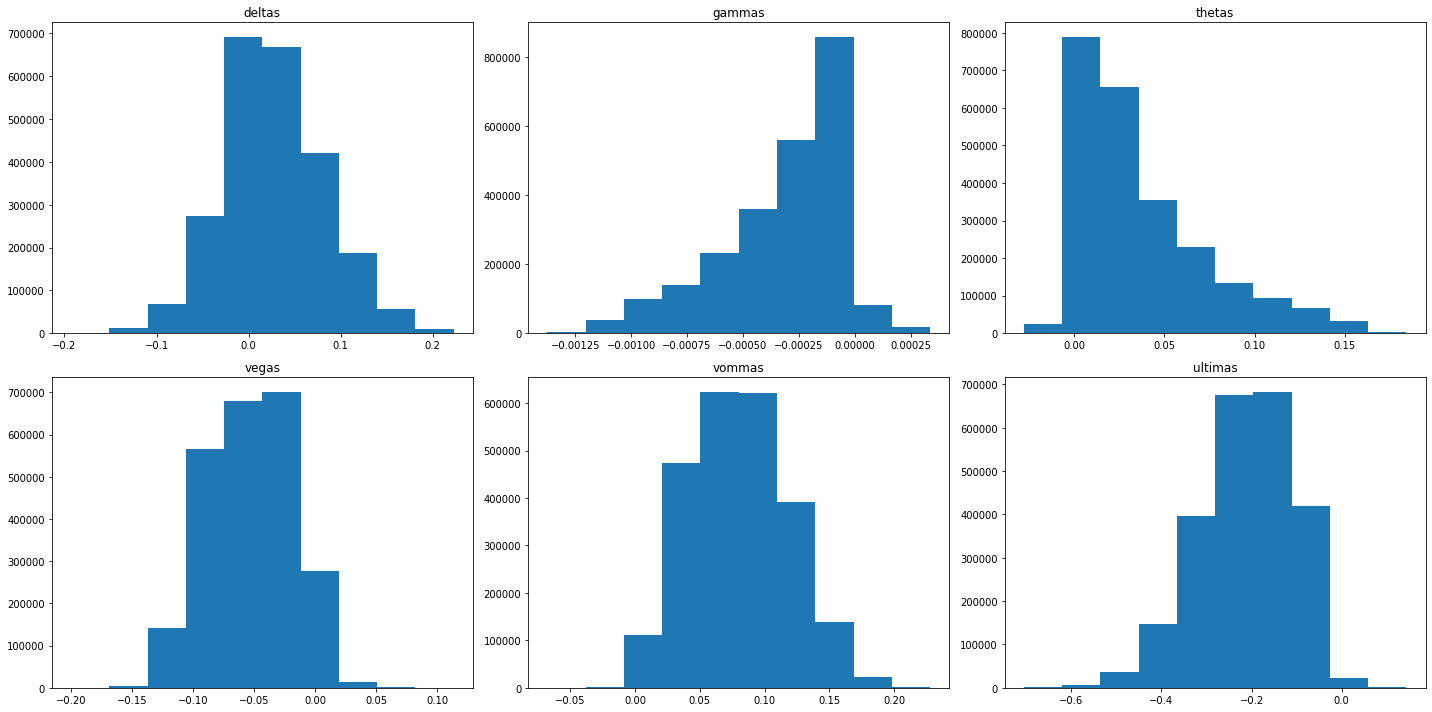

In [155]:
f, ax = plt.subplots(2, 3, figsize=(20, 10))
for i, key in enumerate(stats):
    
    if i < 3:
        j = 0
    else:
        j = 1
    
    ax[j][i % 3].hist(stats[key])
    ax[j][i % 3].set_title(key)

f.tight_layout()
f.savefig("plots/same_expiration_greeks.png")